# Multiple Regression

Let's grab a small little data set of Blue Book car values:

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')


Mileage
(0, 10000]        22527.266614
(10000, 20000]    21455.203674
(20000, 30000]    20066.615098
(30000, 40000]    18870.630638
Name: Price, dtype: float64


<AxesSubplot:xlabel='Mileage', ylabel='Price'>

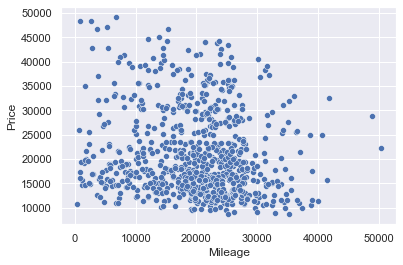

In [78]:
%matplotlib inline
import numpy as np

df = df[df['Price'] < 50000]
    
X = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']

df1=df[['Mileage','Price']]
bins =  np.arange(0,50000,10000)
groups = df1.groupby(pd.cut(df1['Mileage'],bins)).mean()
print(groups['Price'])




sns.scatterplot(x=X['Mileage'], y=y)
    


We can use pandas to split up this matrix into the feature vectors we're interested in, and the value we're trying to predict.

Note how we are avoiding the make and model; regressions don't work well with ordinal values, unless you can convert them into some numerical order that makes sense somehow.

Let's scale our feature data into the same range so we can easily compare the coefficients we end up with.

     const   Mileage  Cylinder     Doors
0      1.0 -1.436967  0.566377  0.541884
1      1.0 -1.324197  0.566377  0.541884
2      1.0 -0.823148  0.566377  0.541884
3      1.0 -0.434992  0.566377  0.541884
4      1.0 -0.004393  0.566377  0.541884
..     ...       ...       ...       ...
799    1.0 -0.448934  0.566377  0.541884
800    1.0 -0.095324  0.566377  0.541884
801    1.0  0.076052  0.566377  0.541884
802    1.0  0.754029  0.566377  0.541884
803    1.0  1.948726  0.566377  0.541884

[793 rows x 4 columns]


<ipython-input-79-823da9d3459a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)
C:\Users\pc\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     119.5
Date:                Wed, 30 Jun 2021   Prob (F-statistic):           8.67e-64
Time:                        19:49:29   Log-Likelihood:                -8167.7
No. Observations:                 793   AIC:                         1.634e+04
Df Residuals:                     789   BIC:                         1.636e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.078e+04    256.060     81.157      0.000    2.03e+04    2.13e+04
Mileage    -1091.1831    256.164     -4.260      0.000   -1594.026    -588.340
Cylinder    4683.1770    256.409     18.264      0.000    4179.853    5186.501
Doors       -706.2737    256.395     -2.755      0.006   -1209.570    -202.977
==============================================================================
Omnibus:                      111.262   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.995
Skew:                           1.097   Prob(JB):                     1.81e-35
Kurtosis:                       2.831   Cond. No.                         1.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

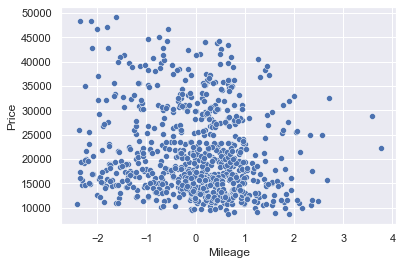

In [79]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

# sns.scatterplot(x=X['Mileage'], y=y)
X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)
sns.scatterplot(x=X['Mileage'], y=y)
X = sm.add_constant(X)
print (X)

est = sm.OLS(y, X).fit()

est.summary()

The table of coefficients above gives us the values to plug into an equation of form:
    B0 + B1 * Mileage + B2 * cylinders + B3 * doors
    
In this example, it's pretty clear that the number of cylinders is more important than anything based on the coefficients.

Could we have figured that out earlier?

In [38]:
y.groupby(df.Doors).mean()

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

Surprisingly, more doors does not mean a higher price! (Maybe it implies a sport car in some cases?) So it's not surprising that it's pretty useless as a predictor here. This is a very small data set however, so we can't really read much meaning into it.

How would you use this to make an actual prediction? Start by scaling your multiple feature variables into the same scale used to train the model, then just call est.predict() on the scaled features:

In [50]:
scaled = scale.transform([[45000, 8, 4]])
scaled = np.insert(scaled[0], 0, 1)
print(scaled)
predicted = est.predict(scaled)
print(predicted)

[1.         3.07256589 1.96971667 0.55627894]
[27658.15707316]


## Activity

Mess around with the fake input data, and see if you can create a measurable influence of number of doors on price. Have some fun with it - why stop at 4 doors?